# Code up and then test the following things:

--- 

1. [done] sample from priors: M$_*$, SFR, tx 
2. [done] sample from priors: M$_*$, SFR, tx, Av, Z, z
4. [done] generate an SFH
5. [done] generate a spectrum with M*, SFR, tx, Av, Z, z inputs
6. import a filterset
7. generate an SED with a given filterset
9. make a pre-grid
10. fit an observed SED w/ pre-grid, single Nparam
11. fit an observed SED w/ MCMC, single Nparam
12. fit an observed SED w/ nested sampling, single Nparam
14. vary Nparam, perform model selection w/ BIC
15. vary Nparam, perform model selection w/ evidence

In [2]:
import matplotlib.pyplot as plt
import dense_basis as db

Initialized stellar population with FSPS.


In [3]:
# print priors
db.print_priors()

The prior on log mass is uniform from 9.0 to 12.0
The prior on log SFR_inst is uniform from -1.0 to 2.0
The prior on redshift is uniform from 0.9 to 1.1
The prior on log metallicity/Zsolar is uniform from -1.5 to 0.5
The prior on dust (model: Calzetti) is uniform from 0.0 to 1.0


[11.54645309 -0.46331223  1.          0.457921  ]


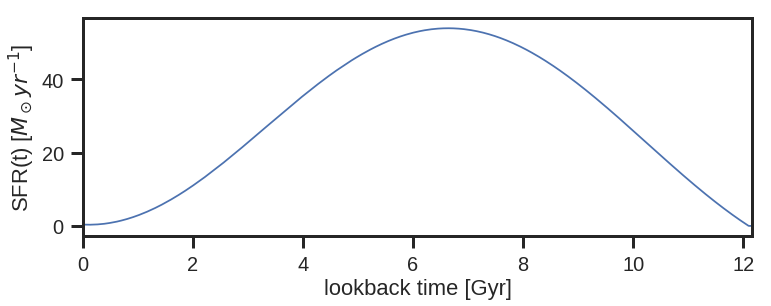

In [4]:
# sample from priors: M*, SFR, tx, Av, Z, z

rand_sfh_tuple = db.sample_sfh_tuple(random_seed = 15, Nparam = 1)
print(rand_sfh_tuple)

rand_sfh, rand_time = db.gp_sfh_sklearn(rand_sfh_tuple, zval = 0.1)

db.plot_sfh(rand_time, rand_sfh, lookback=True)

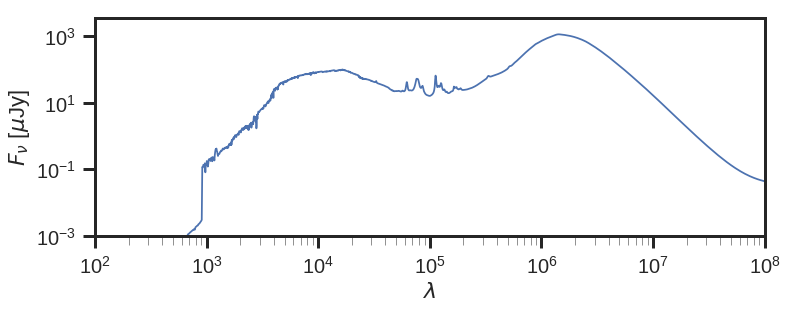

In [5]:
rand_sfh_tuple, rand_Z, rand_Av, rand_z = db.sample_all_params(random_seed = 15, Nparam = 1)
rand_spec, rand_lam = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_lam = True)

db.plot_spec(rand_lam, rand_spec)

# check prior distributions

100%|██████████| 10000/10000 [00:00<00:00, 34998.41it/s]


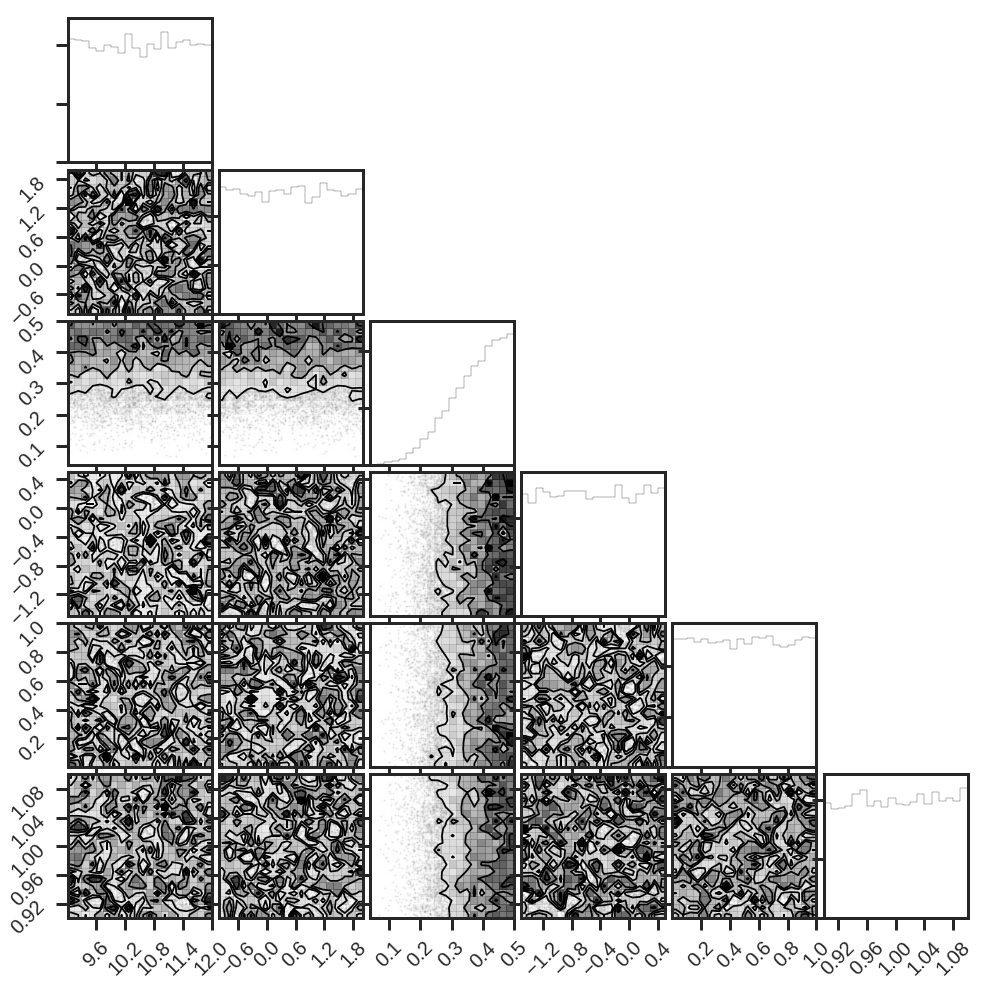

In [13]:
import numpy as np
from tqdm import tqdm
import corner

N_samples = 10000

rand_sfh_tuples = np.zeros((len(rand_sfh_tuple), N_samples))
rand_Zs = np.zeros((N_samples,))
rand_Avs = np.zeros((N_samples,))
rand_zs = np.zeros((N_samples,))

for i in tqdm(range(N_samples)):
    rand_sfh_tuples[0:,i], rand_Zs[i], rand_Avs[i], rand_zs[i] = db.sample_all_params(random_seed = 15+i, Nparam = 1)
    
theta = np.vstack([rand_sfh_tuples[0,0:], rand_sfh_tuples[1,0:], rand_sfh_tuples[3,0:], rand_Zs, rand_Avs, rand_zs])
    
corner.corner(theta.T)
plt.show()